In [1]:
#Importing required packages
import numpy as np      
import pandas as pd      
import os
import matplotlib.pyplot as plt #visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls

In [2]:
#Reading the dataset
data= pd.read_csv("train.csv")   
#and visualizing the data heads
data.head(5)  

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url  zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0  
4                                                NaN    20009      0.0   1.0  

[5 rows x 29 columns]

In [3]:
data.describe()

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

In [4]:
for column in data.columns:
  if (data[column].dtype) == 'object' and column != 'zipcode' and column != 'name' and column != 'thumbnail_url':  
    print(column,"\n/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*")
    print(data[column].unique())
    print("\n/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*")

property_type 
/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island']

/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
room_type 
/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
['Entire home/apt' 'Private room' 'Shared room']

/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*
amenities 
/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*

Visualization of the 'log_price' according to 'neighbourhood' and the 'review_scores_rating' affecting it.
With the joint plot we can see the correlation between the two features.

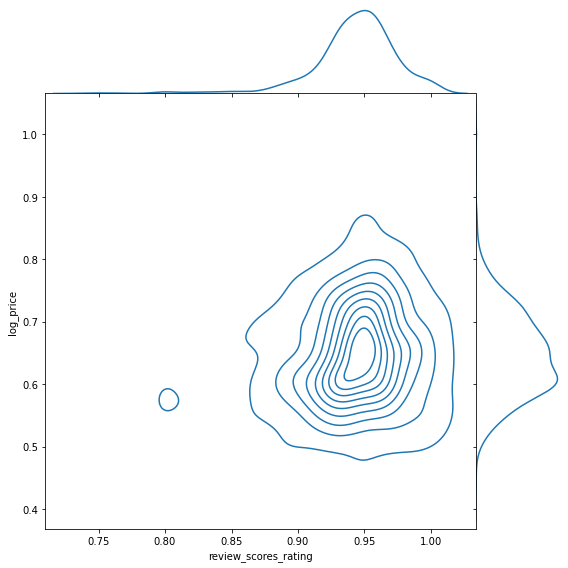

In [5]:
dataframe=pd.pivot_table(data, index = 'neighbourhood', values=["log_price","review_scores_rating"])
#to normalize
dataframe["log_price"]=dataframe["log_price"]/max(dataframe["log_price"])
dataframe["review_scores_rating"]=dataframe["review_scores_rating"]/max(dataframe["review_scores_rating"])
sns.jointplot(dataframe.review_scores_rating,dataframe.log_price,kind="kde",height=8,space=0)
plt.savefig('graph.png')
plt.show()

<AxesSubplot:ylabel='property_type'>

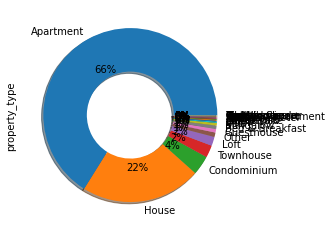

In [6]:
data["property_type"].value_counts().plot.pie(autopct='%1.0f%%', wedgeprops={'width': 0.5}, shadow=True)

count         74111
unique           35
top       Apartment
freq          49003
Name: property_type, dtype: object


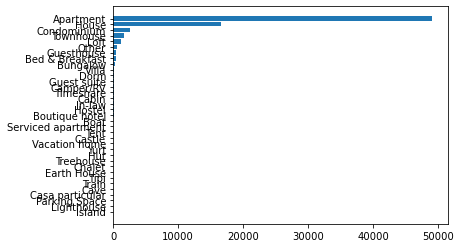

In [7]:
x = list(data["property_type"].value_counts().keys())
x = x[::-1]
y = list(data["property_type"].value_counts())                 #Bar plot
y = y[::-1]
plt.barh(x,y)
print(data["property_type"].describe())

<AxesSubplot:ylabel='room_type'>

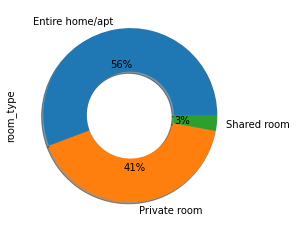

In [8]:
data["room_type"].value_counts().plot.pie(autopct='%1.0f%%', wedgeprops={'width': 0.5}, shadow=True)

count               74111
unique                  3
top       Entire home/apt
freq                41310
Name: room_type, dtype: object


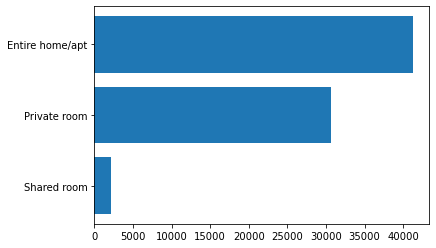

In [9]:
x = list(data["room_type"].value_counts().keys())
x = x[::-1]
y = list(data["room_type"].value_counts())                 #Bar plot
y = y[::-1]
plt.barh(x,y)
print(data["room_type"].describe())

<AxesSubplot:ylabel='bed_type'>

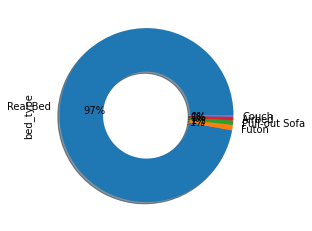

In [10]:
data["bed_type"].value_counts().plot.pie(autopct='%1.0f%%', wedgeprops={'width': 0.5}, shadow=True)

count        74111
unique           5
top       Real Bed
freq         72028
Name: bed_type, dtype: object


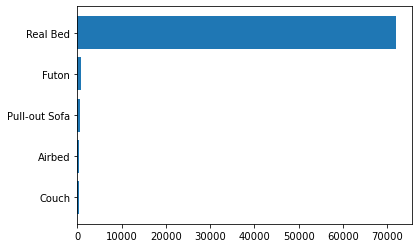

In [11]:
x = list(data["bed_type"].value_counts().keys())
x = x[::-1]
y = list(data["bed_type"].value_counts())                 #Bar plot
y = y[::-1]
plt.barh(x,y)
print(data["bed_type"].describe())

<AxesSubplot:ylabel='cancellation_policy'>

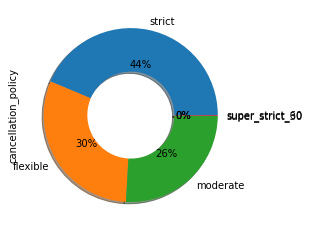

In [12]:
data["cancellation_policy"].value_counts().plot.pie(autopct='%1.0f%%', wedgeprops={'width': 0.5}, shadow=True)

count      74111
unique         5
top       strict
freq       32374
Name: cancellation_policy, dtype: object


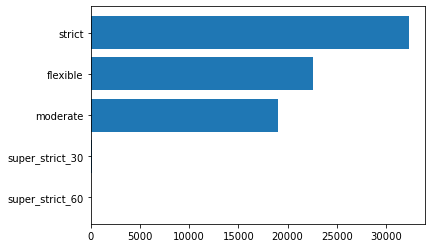

In [13]:
x = list(data["cancellation_policy"].value_counts().keys())
x = x[::-1]
y = list(data["cancellation_policy"].value_counts())                 #Bar plot
y = y[::-1]
plt.barh(x,y)
print(data["cancellation_policy"].describe())

<AxesSubplot:ylabel='city'>

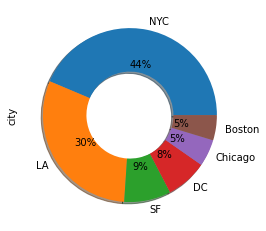

In [14]:
data["city"].value_counts().plot.pie(autopct='%1.0f%%', wedgeprops={'width': 0.5}, shadow=True)

count     74111
unique        6
top         NYC
freq      32349
Name: city, dtype: object


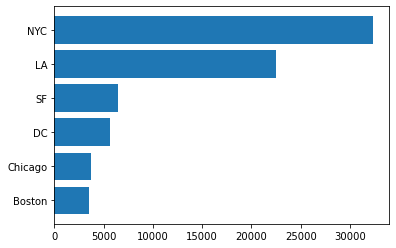

In [15]:
x = list(data["city"].value_counts().keys())
x = x[::-1]
y = list(data["city"].value_counts())                 #Bar plot
y = y[::-1]
plt.barh(x,y)
print(data["city"].describe())

Visualising the boolean features all together:

In [16]:
data_boolean = data[["instant_bookable", "host_identity_verified", "host_has_profile_pic", "cleaning_fee"]]

In [17]:
#converting the bool feature tothe string
data_boolean['cleaning_fee'] = data_boolean['cleaning_fee'].map({True: 't', False: 'f'})

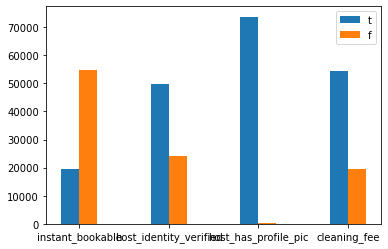

In [18]:
zeros = [data_boolean[column].value_counts()['t'] for column in data_boolean.columns]
ones = [data_boolean[column].value_counts()['f'] for column in data_boolean.columns]
n = len(data_boolean.columns)
plt.bar(np.arange(n)-0.1, zeros, width=0.2, label='t')
plt.bar(np.arange(n)+0.1, ones, width=0.2, label='f')
plt.xticks(np.arange(n), data_boolean.columns)
plt.legend()
plt.show()

In [19]:
def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=data, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

Violin Plot for Price Distribution in Various cities:

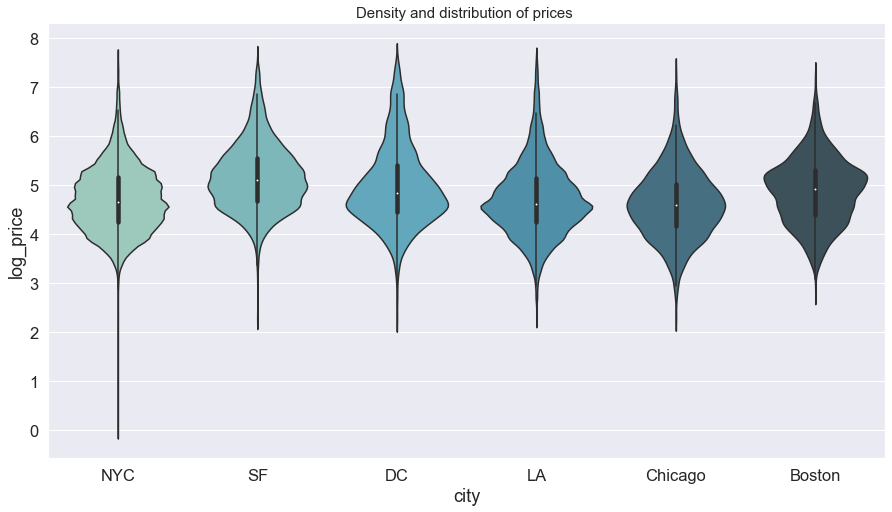

In [20]:
plot_violinplot("city","log_price")

Violin Plot for Price Distribution in Various room_types:

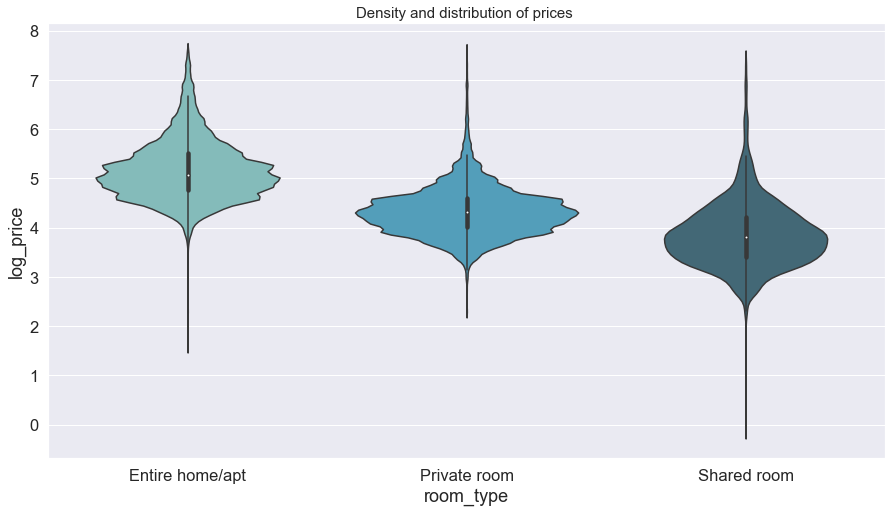

In [21]:
plot_violinplot("room_type","log_price")

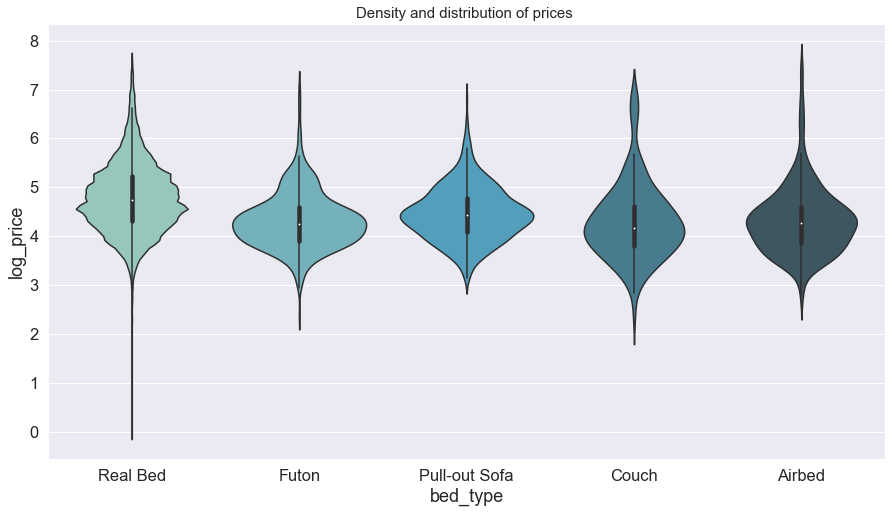

In [22]:
plot_violinplot("bed_type","log_price")

Distribution of the Accommodates

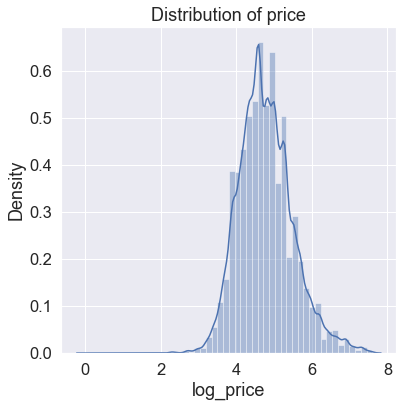

In [23]:
plt.figure(figsize=(6, 6))
sns.distplot(data['log_price'])
plt.title('Distribution of price')
plt.show()

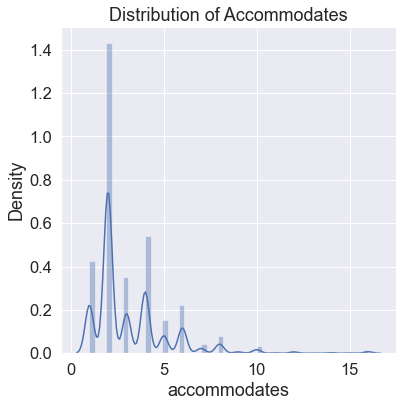

In [24]:
plt.figure(figsize=(6, 6))
sns.distplot(data['accommodates'])
plt.title('Distribution of Accommodates')
plt.show()

Most Expensive and The Cheapest Neighbourhoods:

In [25]:
a = data.groupby('neighbourhood')['log_price'].mean().sort_values(ascending=True).head(15)
d = data.groupby('neighbourhood')['log_price'].mean().sort_values(ascending=False).head(15)

Text(0.5, 1.0, 'The most expensive neighbourhood')

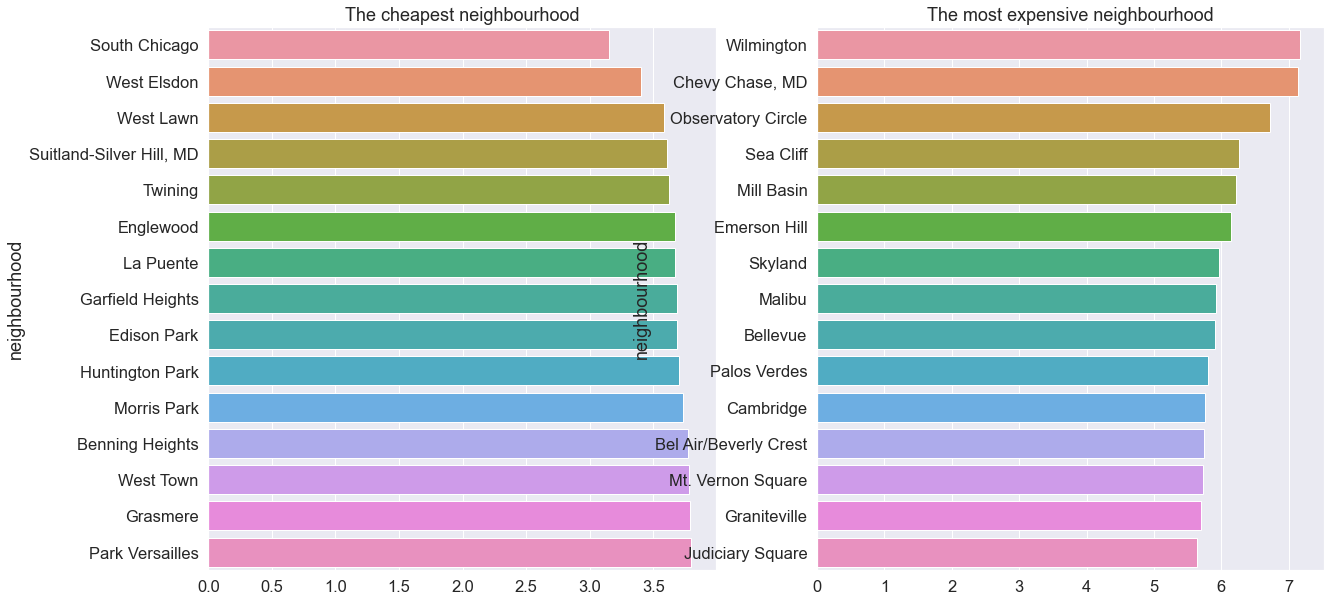

In [26]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1)
ax1.set_title('The cheapest neighbourhood')

ax2 = fig.add_subplot(122)
sns.barplot(y=d.index, x=d.values, ax=ax2)
ax2.set_title('The most expensive neighbourhood')

Distribution of Room Types in Each City:

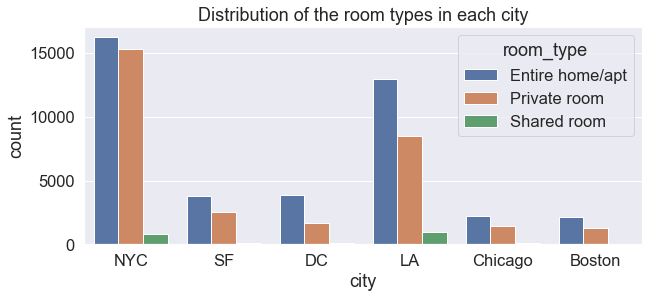

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(data['city'], hue=data['room_type'])
plt.title('Distribution of the room types in each city')
plt.show()

NYC has the largest number of rooms. Mostly the room types in NYC is Entire home/apt.

Correlation Graphics Between Each Column and the Price

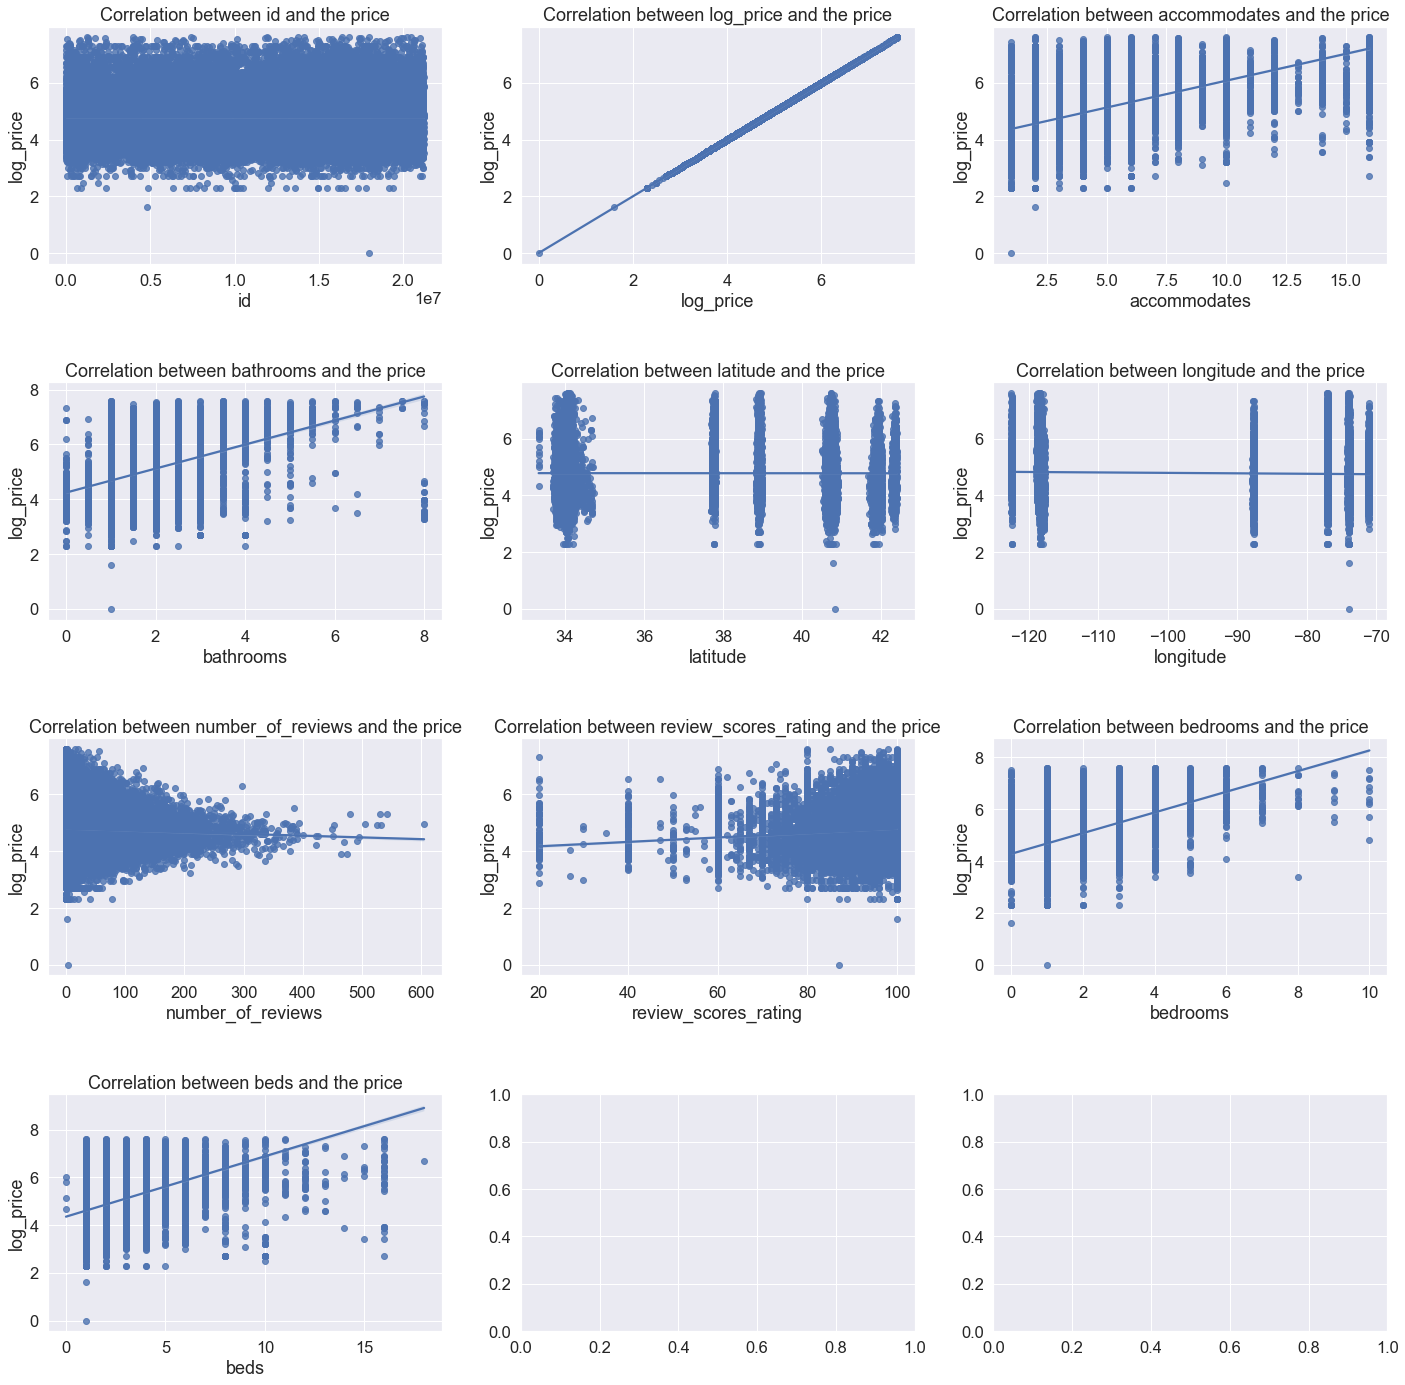

In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
nrows = int(len(newdf.columns) / 3) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(24, 6*nrows))
fig.subplots_adjust(hspace=0.5)

for ax, name in zip(axes.flatten(), newdf.columns):
  
  sns.regplot(x=name, y='log_price', data=newdf, ax=ax)
  ax.set_title(f"Correlation between {name} and the price")

plt.show()

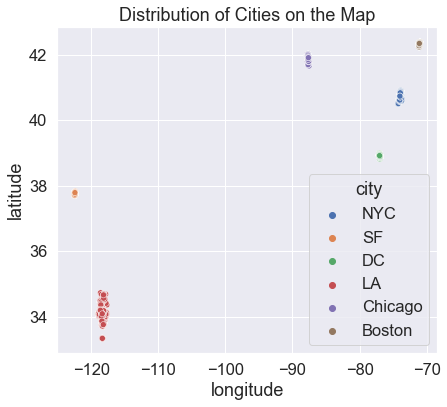

In [29]:
fig = plt.figure(figsize=(15,6))
ax2 = fig.add_subplot(122)
sns.scatterplot(data['longitude'], data['latitude'], hue=data['city'], ax=ax2)
ax2.set_title('Distribution of Cities on the Map')
plt.show()

In [30]:
import folium
from folium.plugins import FastMarkerCluster

latitudes = np.array(data['latitude'])
longitudes = np.array(data['longitude'])
la_mean = latitudes.mean()
lo_mean = longitudes.mean()
locations = list(zip(latitudes, longitudes))

m = folium.Map(location=[la_mean, lo_mean], zoom_start= 11.5)
FastMarkerCluster(data=locations).add_to(m)
m

In [31]:
# Setting up display parameters

pd.set_option('display.max_columns', None)

%matplotlib inline

In [32]:
%%HTML
<style type=""text/css"">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [33]:
import plotly_express as px

In [34]:
fig = px.sunburst(data, path=['city', 'room_type'], 
                  title='Distribution of listings by Suburb and Street')
fig.show()

In [36]:
temp = data.sort_values(['city','accommodates'], ascending=False) \
                        .groupby('city').head(20)
fig = px.icicle(temp, path=[px.Constant("all"), 'city', 'name'], 
                values='accommodates', color='accommodates',
               title='Top Listings in each Neighbourhood Group based on Reviews per month')
fig.update_traces(root_color="lightgrey")

fig.show()